Feature extraction untuk mendeteksi objek.

Jenis jenis machine learning:
1. Supervised learning
    dataset yg digunakan memiliki label dan algoritma kemudian mepelajari pola dari pasangan data dan label tersebut.
2. Unsupervised learning
    tidak ada label di dataset, melakukan proses belajar sendiri untuk melabeli/mengelompokkan data.
3. Semi-supervised learning
    gabungan dari 1 dan 2, di dataset half half ada label dan tidak
4. Reinforcement learning
    belajar menggunakan sistem reward dan penalti, belajar melalui proses trial dan error. ada action, agent, environment, dan reward

scripting, interactive

library ada numpy, pandas, matplotlib, tensorflow, scikit learn, keras dan pytorch

### Data Collecting

sumber untuk data collecting ada UCI ML Repository, kaggle, google dataset search engine, tensorflow dataset, satu data indonesia, US gov data, open data jawa barat

### Data Cleaning

konsistensi format, skala data, duplikasi data, missing value, skewness dist (keseimbangan data, atau untuk menghindari bias dan imbalance data, misal model cenderung memprediksi sesuatukarena ia lebih sering mempelajari hal tsb)

### Data Processing

Cenderung pake pandas, untuk manip tabel numerik dan time series. 

### Data Preparation
data ada 2 jenis yaitu numerik dan kategorik
ML tidak dapat mengolah data kategorik, jadi harus convert ke numerik, misal regresi linear dan SVM hanya menerima input numerik. Teknik convertnya itu dengan menggunakan 
- One Hot Encoding atau dummy variables

misal 0 untuk false dan 1 untuk true

- Outlier Removal

outlier adalah sebuah nilai yang jauh berbeda dari kumpulan nilai lainnya dan dapat mengacaukan hasil dari sebuah analisis statistik.

- Normalization

tujuannya mengubah nilai nilai dari sebuah fitur ke dalam skala yg sama
misal ada 2 fitur contoh gaji dan umur, gaji sampe jutaan angkanya, sedangkan umur puluhan, skalanya jauh beda. kalau bikin model seperti regresi linear, hal ini sangat mempengaruhi hasil prediksi.
normalization bisa pake min-max scaling, dimana nilai nilai akan dipetakan ke dalam skala 0 sampai 1, dari lib sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

scaler = MinMaxScaler() #kita bikin objek minmaxscaler
scaler.fit(data) #panggil fungsi fit untuk menghitung nilai minimum dan maksimum pada setiap kolom
# komputer baru ngitung nilai min dan max pada tiap kolom dan belum melakukan operasi scaler, panggil
# fungsi transform() untuk mengaplikasikan scaler

print(scaler.transform(data))

- Standardization

proses konversi nilai nilai dari suatu fitur sehingga nilai tsb punya skala yg sama. contoh metodenya Z Score dimana setiap nilai pada sebuah atribut numerik akan dikurangi dengan rata2 dan dibagi dengan standar deviasi dari seluruh nilai pada sebuah kolom atribut. serupa dengan normalization

In [9]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

#bisa nulisnya kek yg normalization
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data


array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

### Data Storage/Warehouse
- RDBMS, (yang serba sql, mysql, postgresql microsoft sql server)
- NoSQL (doc, graph, key-value, dan column based), cthnya mongodb, couchdb, cassandra, redis, neo4j dan riak.
- Firebase realtime database,
database yang menyimpan data yang berubah seiring waktu, disimpan dalam format waktu dan nilai pada waktu yg terkait.
- Apache Spark,
perangkat lunak untuk pemrosesan dan analisis data berskala besar. Spark dapat digunakan dalam proses ETL (Extract, Transform, Load), data streaming, perhitungan grafik, SQL, dan machine learning
- Biq Query,
data warehouse berbasis cloud untuk perusahaan yang menawarkan penyimpanan data berbasis SQL dan analisis data berukuran besar. Karena berbasis cloud dan tidak ada infrastruktur yang perlu dikelola, pengguna dapat berfokus pada pengolahan data tanpa memerlukan seorang administrator database. 

### Datasets
bagi dataset jadi 2 yaitu training set dan test set, biasanya train set lebih banyak daripada test set(?) pembagian data training dan data testing yang paling umum adalah 80:20, 70:30, atau 60:40 tergantung dari ukuran atau jumlah data. untuk dataset berukuran besar, proporsi pembagian 90:10 atau 99:1.

kita bisa pake fungsi train_test_split dari sklearn. sebelum displit, fungsi ini akan mengacak dataset secara internal, jadi merata kelasnya. ada random seed untuk internal pseudo-random generator yang digunakan pada proses shuffling. umumnya nilainya 0 atau 1 atau 42. ada random_state gunanya untuk memastikan bahwa hasil pembagian dataset konsisten dan memberikan data yang sama setiap kali model dijalankan. Jika tidak ditentukan, maka tiap kali melakukan split, kita akan mendapatkan data train dan tes berbeda, yang juga akan membuat akurasi model ML menjadi berbeda tiap kali di-run.  

parameter train_Test_split yaitu
x = atribut dari dataset
y = target dari dataset
test_size = persentase test set
random_state (1, 0, atau 42 bebas asal konsisten pake yg mana)

yang akan mengembalikan 4 nilai yaitu:
atribut train set
atribut test set
target train set
target test set

In [ ]:
from sklearn.model_selection import train_test_split
 
X_data = range(10)
y_data = range(10)
 
print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4, random_state = 42)
    print(y_test)
 
 
print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4, random_state = None)
    print(y_test)

In [ ]:
# latihan split
import sklearn
from sklearn import datasets # lib sklearn menyediakan dataset iris, yg umum digunakan untuk masalah klasifikasi

iris = datasets.load_iris()
# pisahkan atribut dan label pada dataset

x = iris.data # adalah array dgn bentuk n_samples, dan n_Features, dimana sample adalah jumlah sampel/baris, dan features adalah jumlah kolom
y = iris.target # atribut berisi label kelas untuk setiap sampel data, misal label 0 kelas A, label 1 kelas B gt gt, arraynya adalah n_samples/baris yg sesuai dengan iris.data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(len(x))
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

### Data Evaluation

misal ada 10 jenis model, latih semua model tsb lalu bandingkan tingkat errornya, pililh yg paling kecil untuk tahap produksi. Lalu ketika diuji pada tahap produksi, tingkat errornya membesar, karena kita mengukur tingkat eror berulang kali pada test set, dan scr tidak sadar memilih model yg hanya bekerja dengan baik pada test set tsb, modelnya buruk ketika menemui data baru. solusinya adalah menambahkan validation set.

- Train, Test, Validation Set (pembagian datanya tambah 1 lagi)
validation/holdout adalah bagian dari train set untuk uji model tahap awal. jangan sampe ukuran validation set nya terlalu besar/kecil. solusinya pake cross validation

- Cross Validation
K-Fold Cross Validation. dataset akan dibagi sebanyak k lipatan. pada setiap iterasi setiap fold akan dipakai sekali sbg data test dan fold sisanya dibakai sbg data train. 

pake fungsi cross_val_score(), 4 parameter
clf atau classifier
x atribut dataset
y label dataset
cv yaitu jumlah fold yg akan dipake cross validation

akan mengembalikan nilai berupa larik/array yg terdiri dari akurasi pengujian setiap fold dari dataset.

In [23]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn import tree
# clf itu classifier, yaitu model machine learning
clf = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

elemen pertama dari larik menunjukkan nilai 0.966666667 yg berart ketika fold pertama dijadikan validation set dan fold lainnya dijadikan train set, hasil dari pengujian tsb adalah akurasi sebesar 0.96666. Secara umum jika hasil dari pengujian tiap fold pada cross validation memiliki nilai yang bervariasi dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik.

### Supervised Learning

Algoritma yang termasuk supervised learning di antaranya adalah klasifikasi, regresi, decision tree, dan support vector machine.

algoritma yg populer adalah regresi, biasanya digunakan untuk memprediksi. Misalnya saat kita memprediksi harga rumah, model kita memprediksi harganya Rp. 499.999.000 atau Rp. 500.100.000, padahal harga seharusnya adalah Rp. 500.000.000. Perbedaan ini tak jadi masalah sebab hasil prediksi dalam regresi linear akan berada dalam range bilangan numerik tertentu yang mendekati nilai seharusnya. Inilah yang dimaksud dengan regresi memberikan keluaran yang kontinyu.

kalau klasifikasi itu memprediksi hasil dalam keluaran diskrit, contohnya email spam atau tidak yg tidak ada kontinuitas/kategori antara spam dan tidak.
algoritma lainnya: Linear Regression, Logistic Regression, Classification, Decision Trees, Support Vector Machines, Neural Networks.

- Binary Classification
klasifikasi adalah teknik untuk menentukan kelas atau kategori berdasarkan atribut yang diberikan. Klasifikasi yang menghasilkan dua kategori disebut klasifikasi biner, sedangkan klasifikasi yang menghasilkan 3 kategori atau lebih disebut multiclass classification atau klasifikasi banyak kelas. 

- Decision Tree
dipakai untuk masalah klasifikasi dan regresi. merupakan komponen pembangun utama algo random forest. DT memprediksi kelas/klasifikasi atau nilai/regresi berdasarkan aturan2 yg dibentuk setelah mempelajari data.

#### Latihan SKLearn Decision Tree

In [13]:
import pandas as pd
iris = pd.read_csv('iris/Iris.csv')

In [ ]:
iris.info()

In [ ]:
iris.head()

In [14]:
# drop fitur yang ga guna
iris.drop('Id',axis=1,inplace=True)

In [15]:
# memisahkan atribut dan labe
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)


In [17]:
from sklearn.tree import DecisionTreeClassifier
# definisikan model decision tree yang akan digunakan
tree_model = DecisionTreeClassifier()
# melatih model dengan menggunakan data latih
tree_model = tree_model.fit(x_train, y_train)

In [18]:
# uji model menggunakan data test dengan menggunakan predict()
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Selain melakukan prediksi, kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan library Graphviz. Hasil dari graphviz adalah dot file yang akan muncul pada folder file di panel sebelah kiri Google Colab (jika Anda menggunakan Google Colab).

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file= "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Setelah kode di atas berhasil dijalankan, Anda akan mendapatkan output berupa berkas iris_tree.dot yang bisa kita convert ke png menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/. yang akan menghasilkan hasil visualisasi dari model decision tree yg telah digunakan.

Catatan : Jangan lupa ganti opsi ke images sebelum menekan tombol convert

- Regression

mirip klasifikasi, kalau klasifikasi itu memprediksi sebuah kelas, model regresi memprediksi bilangan kontinu/numerik. misal mempredisi gaji berdasarkan atribut2 spt lama kerja, industri dan tingkat pendidikan.
regresi ada linear, polinomial, lasso regression, stepwise regression dsb.

1. Linear Regression

cth paling terkenal memperkirakan harga rumah berdasarkan fitur yang terdapat pada rumah seperti luas rumah, jumlah kamar tidur, lokasi dan sebagainya. Regresi linier cocok dipakai ketika terdapat hubungan linear pada data. 

regresi linear adalah teknik untuk memprediksi sebuah nilai adri variable Y (var dependen) berdasarkan beberapa variabel tertentu X (var independen) jika terdapat hubungan linier antara X dan Y.

Hubungan antara hubungan linier dapat direpresentasikan dengan sebuah garis lurus (disebut garis regresi). Ketika sebuah garis regresi digambar, beberapa data akan berada pada garis regresi dan beberapa yang lainnya akan berada di dekat garis tersebut. Sebabnya, garis regresi adalah sebuah model probabilistik dan prediksi kita adalah perkiraan. Jadi tentu akan ada eror/penyimpangan terhadap nilai asli dari variabel Y. Makin jauh jarak data ke garis regresi maka masih banyak error dan model regresi itu belum optimal.

2. Logistic Regression

nama lainnya maximum-entropy classification, dan log-linear classification, jadi dapat digunakan untuk klasifikasi, dimana logistic regression bekerja dengan menghitung probabilitas kelas dari sebuah sampel. 

Contohnya sebuah email memiliki probabilitas 78% merupakan spam maka email tersebut termasuk dalam kelas spam. Dan jika sebuah email memiliki <50% probabilitas merupakan spam, maka email tersebut diklasifikasikan bukan spam.


#### Latihan SKLearn Linear Regression

In [22]:
import numpy as np
# data jumlah kamar
bedrooms = np.array(([1,1,2,2,3,4,4,5,5,5]))

# data harga rumah dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

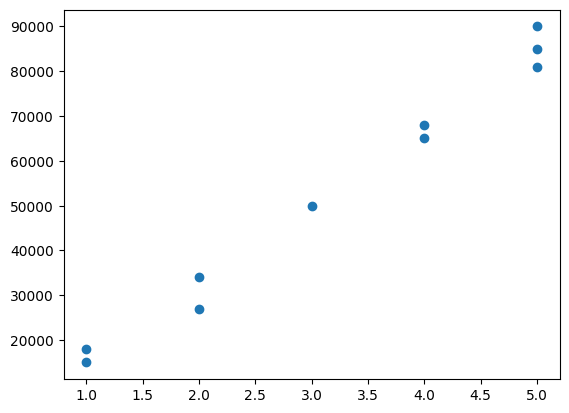

In [24]:
# jumlah kamar pada sumbu X var independen dan harga rumah pada sumbu Y var dependen
# menampilkan data tsb dalam bentuk scatter plot
import matplotlib.pyplot as plt
# menampilkan grafik atau visualisasi secara langsung di dalam halaman notebook
%matplotlib inline 

plt.scatter(bedrooms, house_price)

In [25]:
# mulai melatih model dgn fungsi LinearRegression.fit()
from sklearn.linear_model import LinearRegression

bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

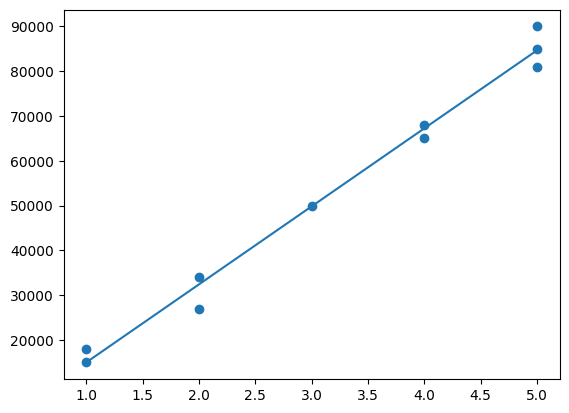

In [26]:
# melihat bagaimana model menyesuaikan dgn data yg kita miliki dengan membuat plot
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

#### Latihan SKLearn Logistic Regression

In [27]:
import pandas as pd

df = pd.read_csv('LogisticRegression/Social_Network_Ads.csv')

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
data = df.drop(columns=['User ID'])

In [35]:
# karena ada gender male dan female, gunakan one-hot encoding/get dummy
# ini karena hasilnya false/true sedangkan kita maunya 0/1
data = data.astype(int)

data = pd.get_dummies(data, dtype=int)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [36]:
# pisahkan atribut dan label
x = data [['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']]
y = data['Purchased'] 

In [37]:
# sebelum split data, lakukan standarisasi/normalisasi
from sklearn.preprocessing import StandardScaler
# membuat objek scaler
scaler = StandardScaler()
# melakukan proses pembelajaran/fitting terhadap x, menghitung mean dan SD dari setiap fitr dataset
scaler.fit(x)
# transform skala data untuk dinormalisasi
scaled_data = scaler.transform(x)
# mengonversi scaled data kedalam dataframe pandas yg akan menggunakan nama kolom yg sama dengan data asli, yaitu X.columns
scaled_data = pd.DataFrame(scaled_data, columns=x.columns)

scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [38]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [39]:
# membuat model dgn membuat objek logistic regression, lalu latih/fitting

from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
# menguji akurasimodel
akurasi_score = model.score(x_test, y_test)
print('Accuracy: ', akurasi_score)

Accuracy:  0.825


### Unsupervised Learning

metode unsupervised slh satunya GANs 

Algoritma yang termasuk adalah clustering, pendeteksian anomali (anomaly detection), dan pengurangan dimensi (dimension reduction), dan density estimation.

Clustering ada data tanpa label, ML akan mempelajari pola dan struktur pada data berdasar hub dan keterkaitan antar variabel pada data. lalu model ML akan mengelompokkan data ini ke dalam beberapa klaster yg berbeda. contoh kasus clustering adalah customer segmentation, customer web ecommrce misalnya.

#### K-Means Clustering
k means pertama tama akan memilih sebuah sampel scr acak untuk dijadikan centroid yaitu sampel pada data yg menjadi pusat dari sebuah klaster. karena centroid merupakan pusat dari sebuah klaster, setiap sampel akan masuk ke klaster. dimana pengelompokan klusternya berdasarkan jarak, mana yg deket dengan centroid, masuk kedalam klaster centroid tsb (langkah kedua)

ketiga, selanjutnya kmeans akan menghitung rata rata dari setiap sampel dan menjadikan rata rata tsb sbg centroid baru.

keempat, langkah kedua diulangi kembali, lalu mengulangi langkah ketiga kembali. Anda akan menemukan rata-rata tiap klaster di tahap keempat akan sama dengan rata-rata tiap klaster pada tahap ketiga sehingga centroidnya tidak berubah. Ketika centroid baru tidak ditemukan, maka proses clustering berhenti.

Untuk mengukur kualitas dari pengklasteran, K-Means akan melakukan iterasi lagi dan mengulangi lagi tahap pertama yaitu memilih sampel secara acak untuk dijadikan centroid. lalu diulangi langkah2 diatas.

dan ternyata hasil iterasi kedua lebih baik drpd pertama. untuk membandingkan klaster setiap iterasi, K-Means akan menghitung variance dari tiap iterasi. Variance adalah persentase jumlah sampel pada tiap klaster. dimana pada kasus ini hasil kedua variancenya lebih seimbang.

Metode Elbow

untuk menentukan jumlah K atau klaster pada kmeans adalh dng melihat langsung persebaran data, tujuannya untuk menentukan elbow/jumlah K yg optimal.

#### Latihan SKLearn K-means

In [42]:
import pandas as pd
df = pd.read_csv('Mailcust/Mall_Customers.csv')

df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [43]:
# rename collom agar lebih seragam
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
# df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1]) kalo gapake inplace true
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head(3)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


axis=0: Ini mengacu pada operasi yang berlangsung sepanjang baris (atau sering disebut sebagai sumbu baris).
axis=1: Ini mengacu pada operasi yang berlangsung sepanjang kolom (atau sering disebut sebagai sumbu kolom).

Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11. Inertia adalah ukuran untuk sejauh mana data poin dalam suatu kluster berjarak dari pusat kluster (centroid). Semakin rendah nilai inertia, semakin baik kluster yang dihasilkan.

In [44]:
from sklearn.cluster import KMeans

x = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yg berisi inertia
clusters = []
for i in range(1,11):
    # membuat objek kmeans dgn jumlah kluster yg sedang dievaluasi, dan fitur x akan  difitting ke model k means yg dibuat
    km = KMeans(n_clusters=i).fit(x)
    # inertia model tsb akan dihitung dan dimasukkan ke dalam array/lis clusters
    clusters.append(km.inertia_)

C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kme

Text(0, 0.5, 'Inertia')

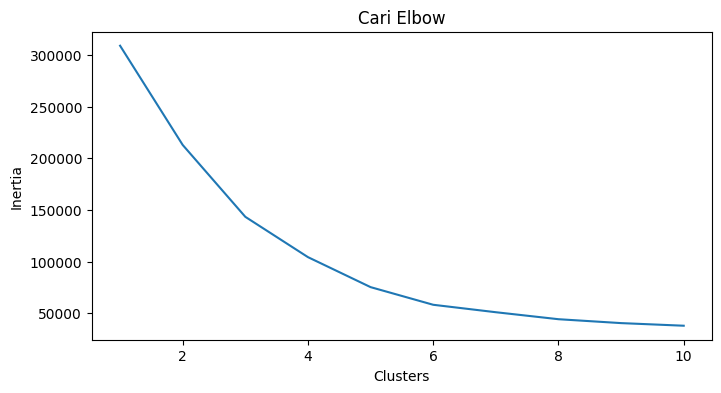

In [51]:
# membuat plot inersia dari tiap nilai K
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat sebuah subplot (gambar atau plot tunggal) dengan ukuran 8x4. fig adalah objek untuk seluruh gambar (figure), dan ax adalah objek untuk sumbu (axes) pada gambar tersebut. Subplot ini akan digunakan untuk menampilkan line plot nanti.
fig, ax = plt.subplots(figsize=(8,4))
# Parameter x adalah nilai-nilai yang akan ditampilkan di sumbu horizontal (x-axis), dalam hal ini, kita menggunakan list dari 1 hingga 10 sebagai nilai x. Parameter y adalah nilai-nilai yang akan ditampilkan di sumbu vertikal (y-axis), yaitu data dari list clusters. Parameter ax digunakan untuk menentukan di subplot mana line plot akan ditampilkan, yaitu subplot yang telah dibuat sebelumnya.
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5.

C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


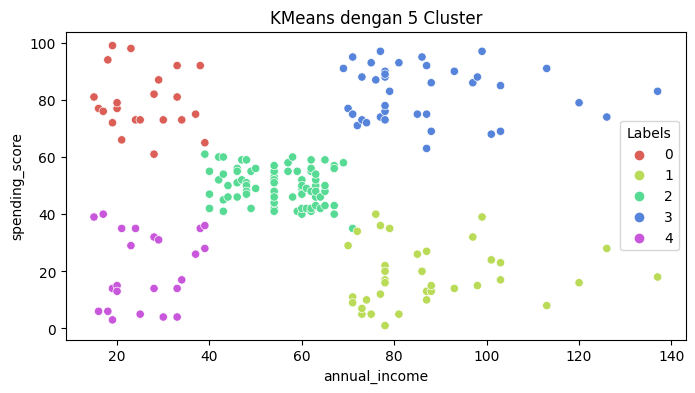

In [47]:
# melatih kembali kmeans dgn jumlah k yang didapat dari elbow
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)
 
# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

#### Dimensionality Reduction: LDA, PCA, t-SNE
misalnya itu dalam image recognition, kan atribut dari imagenya adalah jumlah pixelnya, tp tidak semua pixel didalam gambar itu dipake untuk pelatihan. jadinya direduksi.

- Principal Component Analysis (PCA)

mereduksi dimensi atau mengurangi jumlah atribut pada dataset tanpa mengurangi informasi. Pada PCA setiap atribut disebut sebagai principal component. Jika terdapat 10 atribut pada dataset, berarti terdapat 10 principal component. PCA bekerja dengan menghitung variance dari tiap atribut. Variance adalah informasi yang dimiliki sebuah atribut. 

- Linear Discriminant Analysis (LDA)

atau analisis diskriminan linier adalah teknik statistika yang dipakai untuk reduksi dimensi. LDA bekerja dengan mencari kombinasi atribut terbaik yang dapat memisahkan kelas-kelas pada dataset dan meminimalkan varian pada masing-masing kelas. Kontras dengan PCA yang bekerja dengan mencari atribut komponen yang memiliki varian tertinggi.

yang membedakan LDA dan PCA adalah PCA merupakan teknik unsupervised karena pada pengurangan dimensi, PCA tidak menghiraukan label yang terdapat pada dataset. Sedangkan LDA merupakan teknik supervised karena LDA memperhatikan bagaimana kelas-kelas pada data dapat dipisahkan dengan baik. 

- t-sne

t-Distributed Stochastic Neighbor Embedding adalah teknik non linear unsupervised yang digunakan untuk reduksi dimensi, eksplorasi data, dan visualisasi data berdimensi tinggi. Algoritma t-SNE memungkinkan kita untuk memisahkan data yang tidak dapat dipisahkan oleh garis linear.

t-SNE mengurangi dimensi dengan menjaga sampel-sampel yang mirip agar berdekatan, dan sebaliknya, sampel-sampel yang kurang mirip, berjauhan. 

#### Latihan SKLearn PCA

In [52]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

In [53]:
# menggunakan model decision tree dan menghitung berapa akurasinya tanpa menggunakan pca
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(x_train, y_train)
model_pertama.score(x_test, y_test)

0.9666666666666667

In [55]:
# kemudian menggunakan pcs dan menghitung varians dari setiap atribut
from sklearn.decomposition import PCA
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengapliaksikan pca ke dataset
pca_attributes = pca.fit_transform(x_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Hasilnya adalah 1 atribut memiliki variance sebesar 0.922, yang berarti atribut tersebut menyimpan informasi yang tinggi dan jauh lebih signifikan dari atribut lain. 

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.976 yang sudah cukup tinggi.

In [56]:
# pca dgn 2 principal component
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [59]:
# uji akurasi classifier menggunakan pca
# uji akurasi classifier
model2 = decision_tree.fit(x_train_pca, y_train)
model2.score(x_test_pca, y_test)

0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.